### Chapter 3.2
# Poisson Process
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

A Poisson process with rate $\lambda >0$ is a renewal process in which the interarrival time distribution follows a negative exponential distribution with rate $\lambda$.

We examine some basic properties of the Poisson properties and use the package [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)

## Simulation of Poisson Process
We randomly generate interarrival times $A_i$. The arrival times are $t_i = \sum_{k=0}^i A_k$.

In [6]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

lam = 2 # arrival rate
n = 10000 # there are n customer arrivals

Ai = scipy.stats.expon.rvs(size=n, scale=1/lam) # generate n random interarrival times
ti = Ai.cumsum() # arrival times

print(f'Analysis: E[A]={1/lam}, cA=1')
print(f'Simlation: E[A]={Ai.mean():.2f}, cA={Ai.std()/Ai.mean():.2f}')

Analysis: E[A]=0.5, cA=1
Simlation: E[A]=0.50, cA=1.01


## Thinning a Poisson Process

### Random Thinning
We consider random thinning: With a probability $p$ an arrival event is taken in the thinned process. The empirical CDFs are derived using [`numpy.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)


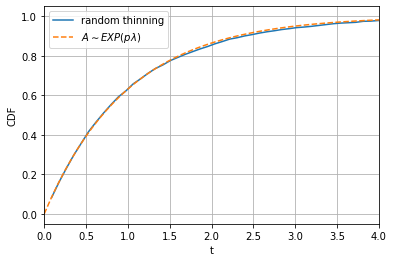

In [26]:
p = 0.5 # probability that arrival event is taken

takeEvent = scipy.stats.uniform.rvs(size=n)<=p # event is taken, if random value r<=p and r~U(0,1)
ti_rndThinning = ti[takeEvent] # timestamps of considered events
Ai_rndThinning = np.diff(ti_rndThinning) # interarrival times of thinned process

# plot empirical CDF
freq,bin_edges = np.histogram(Ai_rndThinning, bins=100, density=True) # relative frequency in bins
plt.plot(bin_edges[1:], freq.cumsum()/freq.sum(), '-', label=f'random thinning')

# compare with theoretical results
ts = np.linspace(0,8/lam)
plt.plot(ts, scipy.stats.expon.cdf(ts, scale=1/(p*lam)), '--', label='$A \sim EXP(p\lambda)$')

plt.xlabel('t')
plt.ylabel('CDF')
plt.legend()
plt.xlim([0,ts[-1]])
plt.grid(which='major')

### Cyclic or Deterministic Thinning
Now, we are skipping every second arrival event. The resulting distribution is, thus, the sum of two exponential phases which is an Erlang $E_2$ distribution with rate $\lambda$. 

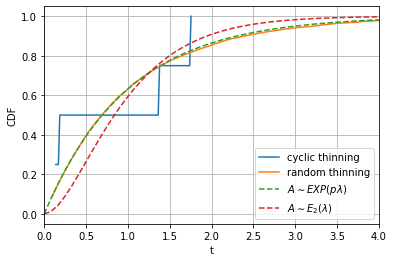

In [65]:
ti_cyclicThinning = ti[np.arange(0, n, step=2)] # timestamps of considered events
Ai_cyclicThinning = np.diff(ti_cyclicThinning) # interarrival times of deterministically thinned process

# plot empirical CDF
cyc_freq, cyc_bin_edges = np.histogram(Ai_cyclicThinning, bins=100, density=True) # relative frequency in bins
plt.plot(cyc_bin_edges[1:], cyc_freq.cumsum()/cyc_freq.sum(), '-', label=f'cyclic thinning')

# compare with random thinning 
plt.plot(bin_edges[1:], freq.cumsum()/freq.sum(), '-', label=f'random thinning')

# plot exponential and Erlang-2 CDFs
plt.plot(ts, scipy.stats.expon.cdf(ts, scale=1/(p*lam)), '--', label='$A \sim EXP(p\lambda)$')
plt.plot(ts, scipy.stats.erlang.cdf(ts, 2, scale=1/lam), '--', label='$A \sim E_2(\lambda)$')

plt.xlabel('t')
plt.ylabel('CDF')
plt.legend()
plt.xlim([0,ts[-1]])
plt.grid(which='major');

## Number of Arrivals within Fixed Interval
The number $N$ of Poisson arrivals within an fixed interval of length $T$ follows a Poisson distribution with parameter $\lambda\cdot T$:

$N \sim \mathrm{POIS}(\lambda\cdot T)$


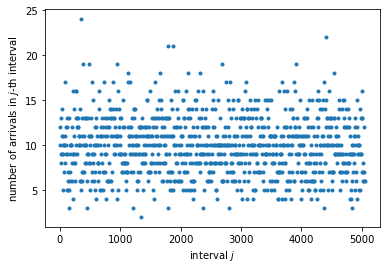

In [38]:
T = 5 

ni, bins = np.histogram(ti, bins=np.arange(0, ti[-1]+T, step=T), density=False) # number of arrivals in intervals

plt.plot(bins[1:],ni,'.')
plt.xlabel('interval $j$')
plt.ylabel('number of arrivals in $j$-th interval');

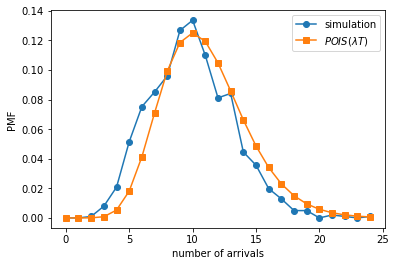

In [60]:
y = np.bincount(ni) # count the occurences for N=k arrivals
x = np.arange(len(y))
plt.plot(x, y/y.sum(), 'o-', label='simulation')

# compare with Poisson distribution
plt.plot(x, scipy.stats.poisson.pmf(lam*T, x), 's-', label='$POIS(\lambda T)$')
plt.ylabel('PMF')
plt.xlabel('number of arrivals')
plt.legend();

To get smoother results, we need to simulate more arrival events. Then, the curves will overlap. 

## Uniform Distribution of Poisson Arrivals
Consider a Poisson process with rate $\lambda$. There are $n$ arrivals within an fixed interval of duration $T$. Then these arrivals are uniformly distributed within this interval. 
The $n$ arrivals are uniformly distributed and occur at times $u_1, u_2, u_3, \dots, u_n$. Note that the times $u_i$ are not ordered. The r.v.s $u_1, u_2, \dots, u_n$ follow all the same uniform distribution.

The arrivals correspond to a Poisson process and the interarrival times are therefore exponentially distributed with parameter $n/T$.

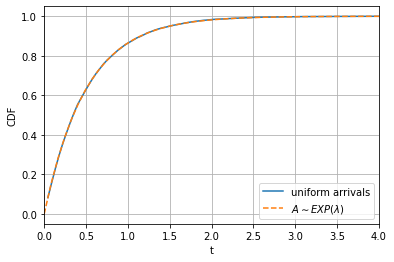

In [68]:
n_ui = 10000 # we consider n arrivals
T_ui = n_ui/lam # the expected length of the arrivals

ui = np.random.rand(n_ui)*T_ui # randomly generate uniformly distributed arrivals in the interval (0,T)
sorted_ui = np.sort(ui) # sort the arrival times
ai_ui = np.diff(sorted_ui) # compute the interarrival times

# empirical CDF
freq_ui, bins_ui = np.histogram(ai_ui, bins=100, density=True) # relative frequency in bins
plt.plot(bins_ui[1:], freq_ui.cumsum()/freq_ui.sum(), '-', label=f'uniform arrivals')
         
# compare with Poisson process         
plt.plot(ts, scipy.stats.expon.cdf(ts, scale=1/(lam)), '--', label='$A \sim EXP(\lambda)$')

plt.xlabel('t')
plt.ylabel('CDF')
plt.legend()
plt.xlim([0,ts[-1]])
plt.grid(which='major');         